In [1]:
class TSuccess(object):
    def __init__(self):
        self.wins = 0
        self.totals = 0
        self.a = 1
        self.b = 1

    def sample(self):
        self.a += (1 + self.wins)
        self.b += (1 + self.totals - self.wins)
    #     print(a,b)
        return np.random.beta(self.a, self.b)

    def add_win(self):
        self.wins += 1

    def add_total(self):
        self.totals += 1


In [9]:
import pandas as pd
import numpy as np
import sys,os
import glob
# %matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle

# startdate = '2019-01-01'
# enddate = '2019-09-19'

# path = './OutputData/'+ensembles[ensembleix]+'/worker_0/fig/'
# path = '../../experiments/phase4/notes/OutputData/RLA3CNet_88pct/worker_0/fig_20190924/'
# title = '021240_코웨이'
# indexpath = path + title+'_result/'+title

ensembles = ['RLA3CNet_90pct','RLA3CNet_88pct']
ensembleix = 1
path = '../../experiments/phase4/notes/OutputData/'+ensembles[ensembleix]+'/worker_0/fig_20190924/'

resultpath = path+'*_result'
files=glob.glob(resultpath)   

problists = {}

for file in files:  
    # print(file)
    stockpath = file+'/*'   

    subfiles=glob.glob(stockpath)   
    # print(stockpath)
    for subfile in subfiles:     
        # print(subfile)
        if '_actions' in subfile:
            # print('actions {}'.format(subfile))
            with open(subfile, 'rb') as f:
                actions = pickle.load(f)
        elif subfile.endswith('_gains'):
            # print('gains {}'.format(subfile))
            with open(subfile, 'rb') as f:
                gains = pickle.load(f)
        elif subfile.endswith('_gains2'):
            # print('gains2 {}'.format(subfile))
            with open(subfile, 'rb') as f:
                gains2 = pickle.load(f)        
        else:
            df_data = pd.read_pickle(subfile)
            stockname = subfile.split('/')[-1]
    
#     print(stockname)
    df_data['actions'] = actions
    df_data['gains'] = gains
    df_data['gains2'] = gains2
    
    df_tmp = df_data[df_data['actions']== 2]['gains']

    df_sellgains = pd.DataFrame({'gains':df_tmp})
    df_sellgains['diff'] = df_sellgains['gains'].diff()
    df_sellgains['diff'] = df_sellgains['diff'].fillna(0)
    # df_sellgains
    df_sellgains['signal'] = 0
    df_sellgains.loc[df_sellgains['diff'] > 0.0,['signal']] = 1
    # df_sellgains['signal'] = df_sellgains[df_sellgains['diff'] <= 0.02] = 0
    df_sellgains['signal'].mean()

    bandits = TSuccess()

    for _val in df_sellgains['signal']:
        bandits.add_total()
        if _val >= 1:
            bandits.add_win()
#     print(bandits.sample(),bandits.totals,bandits.wins)

    # a = 1+6
    # b = 1+20-6
    totalmean = []
    for _ in range(10):
        betamean =[]
        for _ in range(100):
            betamean.append(bandits.sample())
        totalmean.append(np.mean(betamean))
    print("{} is prob of {} ".format(stockname,np.mean(totalmean)))
    
    problists[stockname] = np.mean(totalmean)
#     break
    

122630_KODEX 레버리지 is prob of 0.39176092660917033 
051910_LG화학 is prob of 0.5008296765850602 
034730_SK is prob of 0.5910373283840682 
096770_SK이노베이션 is prob of 0.3798929682136942 
030200_KT is prob of 0.5498684860802416 
004020_현대제철 is prob of 0.40911253269209535 
005930_삼성전자 is prob of 0.4290192496216081 
015760_한국전력 is prob of 0.3632854989666798 
005935_삼성전자우 is prob of 0.3680912824387167 
SPY is prob of 0.4671295341506977 
009540_현대중공업 is prob of 0.3463400764709382 
006400_삼성SDI is prob of 0.4777294568002753 
000270_기아차 is prob of 0.5001343285788721 
010130_고려아연 is prob of 0.47595120867875484 
005490_POSCO is prob of 0.500090868216682 
033780_KT&G is prob of 0.39998439265715774 
055550_신한지주 is prob of 0.5385916483674541 
034220_LG디스플레이 is prob of 0.4996796349667491 
066570_LG전자 is prob of 0.6524471950026809 
032830_삼성생명 is prob of 0.3334350221690384 
009150_삼성전기 is prob of 0.4331684092302678 
011170_롯데케미칼 is prob of 0.5216709372102699 
051900_LG생활건강 is prob of 0.5450316845009281 
03

In [14]:
sortlists = sorted(problists.items(), key=lambda x: x[1],reverse = True)
sortlists

[('066570_LG전자', 0.6524471950026809),
 ('068270_셀트리온', 0.6523154601115297),
 ('021240_코웨이', 0.6317733435592158),
 ('233740_KODEX 코스닥150 레버', 0.6188432196093825),
 ('IXIC', 0.6001896826179502),
 ('086280_현대글로비스', 0.591242021675953),
 ('034730_SK', 0.5910373283840682),
 ('KS11', 0.5790142427612052),
 ('DJI', 0.5626462257139696),
 ('KQ11', 0.5555002467996516),
 ('069500_KODEX 200', 0.5506351257048774),
 ('030200_KT', 0.5498684860802416),
 ('036570_엔씨소프트', 0.5496855725351244),
 ('051900_LG생활건강', 0.5450316845009281),
 ('035420_NAVER', 0.5428623759453747),
 ('055550_신한지주', 0.5385916483674541),
 ('011170_롯데케미칼', 0.5216709372102699),
 ('004990_롯데지주', 0.5185669781937725),
 ('051910_LG화학', 0.5008296765850602),
 ('000270_기아차', 0.5001343285788721),
 ('005490_POSCO', 0.500090868216682),
 ('034220_LG디스플레이', 0.4996796349667491),
 ('086790_하나금융지주', 0.4995744895154505),
 ('006400_삼성SDI', 0.4777294568002753),
 ('010130_고려아연', 0.47595120867875484),
 ('SPY', 0.4671295341506977),
 ('028260_삼성물산', 0.4641097

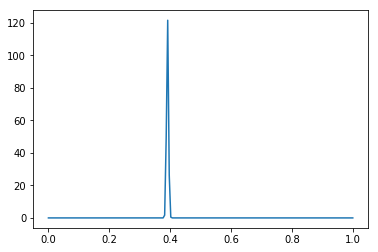

9010 14015


In [7]:
%matplotlib inline 
from scipy.stats import beta


x = np.linspace(0, 1, 200)

y = beta.pdf(x, bandits.a, bandits.b)
plt.plot(x, y)
plt.show()

print(bandits.a, bandits.b)
